In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [55]:
def wiPCA(samples, k=1): 
    if samples.shape[1] < k:
        return False
    # mean centering
    mean = np.mean(samples, axis=0)
    mean_data = samples - mean
    # covariance matrix
    cov = np.cov(mean_data, rowvar=False)
    # eigen vectors and eigen values
    eig_val, eig_vec = np.linalg.eigh(cov)
    # sorting eigen vectors by their eigen values 
    sorted_indices = np.argsort(eig_val)[::-1]
    eig_val = eig_val[sorted_indices]
    eig_vec = eig_vec[:, sorted_indices]
    # extracting k principal components
    principal_components = eig_vec[:, :k]
    # building projection
    pca_projection = np.dot(mean_data, principal_components)
    # building reconstruction of original data
    reconstruction = np.dot(pca_projection, principal_components.T) + mean
    # cumulative sum of explained variance for computing the error (data loss)
    sum_eig_val = np.sum(eig_val)
    explained_variance = eig_val / sum_eig_val
    cumulative_explained_variance = np.cumsum(explained_variance)
    # print("var", explained_variance.shape)
    return pca_projection, reconstruction, cumulative_explained_variance


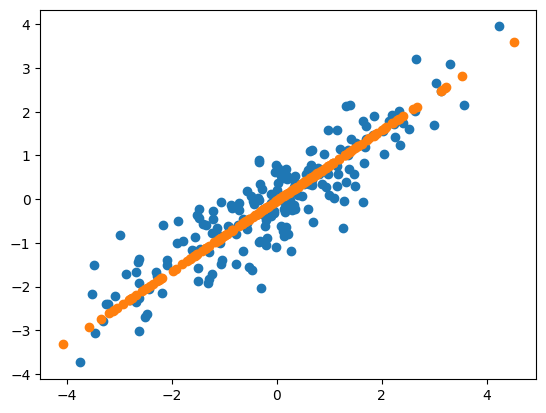

In [56]:
# zad 1.1
s = np.dot(np.random.randn(200, 2), np.random.randn(2, 2))
# zad 1.2
plt.scatter(s[:, 0], s[:, 1])
# zad 1.3
pca_projection, reconstruction, _ = wiPCA(s)
plt.scatter(reconstruction[:, 0], reconstruction[:, 1])
plt.show()


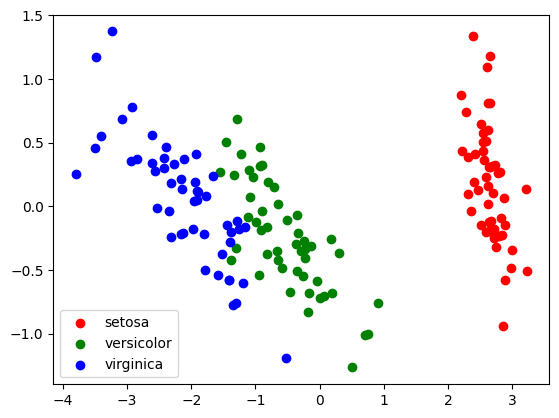

In [57]:
#zad 2.1
iris = datasets.load_iris()
# zad 2.2
pca_projection, _, _ = wiPCA(iris.data, 2)
# plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
# plt.scatter(pca_projection[:, 0], pca_projection[:, 1], c=iris.target)
# zad 2.3
for i, color in enumerate(['red', 'green', 'blue']):
    idx = iris.target == i
    plt.scatter(pca_projection[idx, 0], pca_projection[idx, 1], c=color, label=iris.target_names[i])
plt.legend()
plt.show()

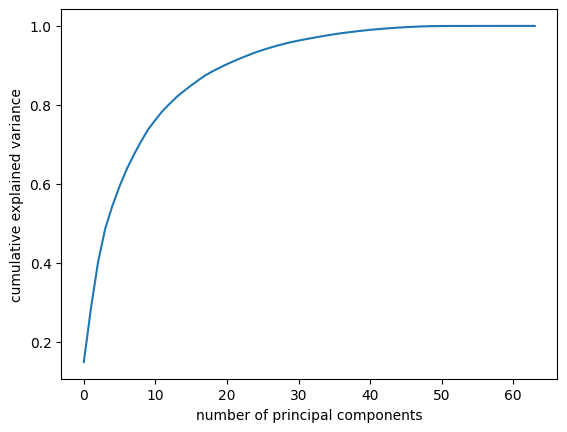

In [58]:
# zad 3.1
digits = datasets.load_digits()
# zad 3.2
pca_projection, _, cumulative_explained_variance = wiPCA(digits.data, 2)
# zad 3.3
plt.plot(cumulative_explained_variance)
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.show()

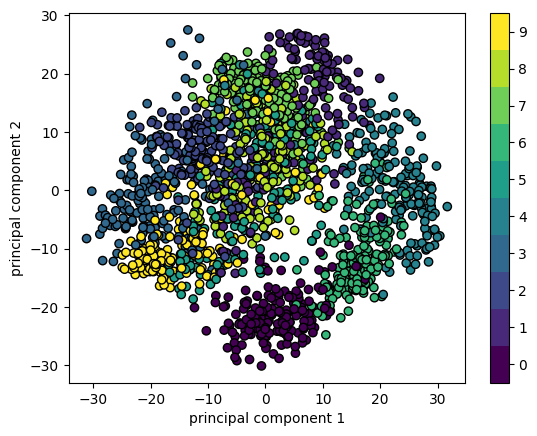

((1797, 64), (200, 2))

In [59]:
# zad 3.4
pca_projection, _, cumulative_explained_variance = wiPCA(digits.data, 4)
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], c=digits.target, edgecolor='k')
plt.colorbar(boundaries=np.arange(-0.5, 10, 1), spacing='proportional', ticks=np.arange(0, 10))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

digits.data.shape, reconstruction.shape 

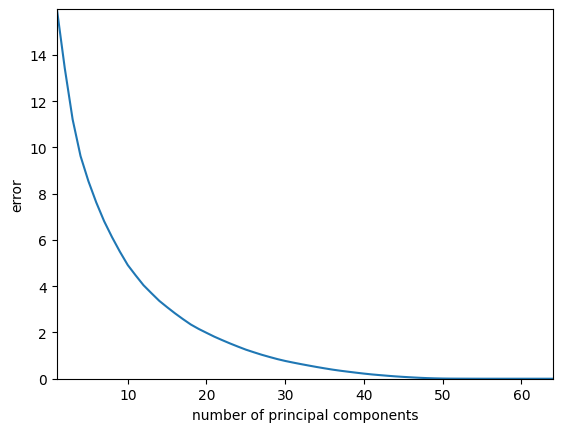

In [61]:
# zad 3.5
errors = []
for num_components in range(1, 65):  
    _, reconstruction, _ = wiPCA(digits.data, num_components)
    error = np.mean((digits.data - reconstruction)**2)
    errors.append(error)

plt.plot(range(1, 65), errors)
plt.xlabel('number of principal components')
plt.ylabel('error')
plt.xlim(1, 64)
plt.ylim(0, np.max(errors))
plt.show()